## Importing Packages

In [26]:
import pandas as pd
#import missingno as msno
import matplotlib as plt
import re
import datetime as dt
import numpy as np

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [5]:
# link to import data
data_url="https://www.berlin.de/sen/uvk/_assets/verkehr/infrastruktur/oeffentliche-toiletten/berliner-toiletten-standorte.xlsx"

## Importing data from source


In [6]:
data = pd.read_excel(data_url)


## Viewing data

## Fixing data structure

In [7]:
# Making row 2 the column headings
data.columns = data.iloc[2]

In [8]:
data.head()

2,LavatoryID,Description,City,Street,Number,PostalCode,Country,Longitude,Latitude,isOwnedByWall,isHandicappedAccessible,Price,canBePayedWithCoins,canBePayedInApp,canBePayedWithNFC,hasChangingTable,LabelID,hasUrinal,FID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LavatoryID,Description,City,Street,Number,PostalCode,Country,Longitude,Latitude,isOwnedByWall,isHandicappedAccessible,Price,canBePayedWithCoins,canBePayedInApp,canBePayedWithNFC,hasChangingTable,LabelID,hasUrinal,FID
3,Wall_101003,Toilette Ottmachauer Steig (oberhalb Badestell...,Berlin,"Krumme Lanke, Quermatenweg (0-24 Uhr)",NaN,14109,Deutschland,"13,240574813","52,453581173",1,0,"0,00",0,0,0,0,5,0,269
4,Wall_112911,Toilette Uferweg,Berlin,"Schlachtensee , Am Schlachtensee ggü. 145 (0-...",NaN,14129,Deutschland,"13,1992287644287","52,4365068880875",1,0,"0,00",0,0,0,0,5,0,NaN


In [9]:
# dropping redundant rows
data.drop([0,1,2],inplace=True)

In [10]:
data

2,LavatoryID,Description,City,Street,Number,PostalCode,Country,Longitude,Latitude,isOwnedByWall,isHandicappedAccessible,Price,canBePayedWithCoins,canBePayedInApp,canBePayedWithNFC,hasChangingTable,LabelID,hasUrinal,FID
3,Wall_101003,Toilette Ottmachauer Steig (oberhalb Badestell...,Berlin,"Krumme Lanke, Quermatenweg (0-24 Uhr)",NaN,14109,Deutschland,"13,240574813","52,453581173",1,0,"0,00",0,0,0,0,5,0,269
4,Wall_112911,Toilette Uferweg,Berlin,"Schlachtensee , Am Schlachtensee ggü. 145 (0-...",NaN,14129,Deutschland,"13,1992287644287","52,4365068880875",1,0,"0,00",0,0,0,0,5,0,NaN
5,Wall_115753,Toilette Am Kiesteich 50,Berlin,Spektepark (0-24 Uhr),NaN,13589,Deutschland,"13,1648593254089","52,5488398803196",1,0,"0,00",0,0,0,0,5,0,NaN
6,Wall_116738,"Wall CT, Hubertusdamm",Berlin,Hubertusdamm ggü. 7 (0-24 Uhr),NaN,13125,Deutschland,"13,4711982596938","52,615670613826",1,1,"0,50",1,1,1,1,1,1,868
7,Wall_116739,"Wall CT, Lindenufer",Berlin,Lindenufer ggü. 10 (0-24 Uhr),NaN,13597,Deutschland,"13,2077640060379","52,537351114776",1,1,"0,50",1,1,1,1,1,0,738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,Fremd_5,Toilette Tempelhofer Feld,Berlin,Tempelhofer Feld,NaN,12049,Deutschland,"13,41755","52,47681",0,1,"0,00",0,0,0,0,6,0,NaN
439,Fremd_6,Toilette Tempelhofer Feld,Berlin,Tempelhofer Feld,NaN,12049,Deutschland,"13,41766","52,47019",0,1,"0,00",0,0,0,0,6,0,NaN
440,Fremd_7,Toilette Tempelhofer Feld,Berlin,Tempelhofer Feld,NaN,12101,Deutschland,"13,38677","52,4713",0,1,"0,00",0,0,0,0,6,0,NaN
441,Fremd_8,Toilette Tempelhofer Feld,Berlin,Tempelhofer Feld,NaN,10965,Deutschland,"13,40995","52,4794",0,1,"0,00",0,0,0,0,6,0,NaN


In [11]:
data

2,LavatoryID,Description,City,Street,Number,PostalCode,Country,Longitude,Latitude,isOwnedByWall,isHandicappedAccessible,Price,canBePayedWithCoins,canBePayedInApp,canBePayedWithNFC,hasChangingTable,LabelID,hasUrinal,FID
3,Wall_101003,Toilette Ottmachauer Steig (oberhalb Badestell...,Berlin,"Krumme Lanke, Quermatenweg (0-24 Uhr)",NaN,14109,Deutschland,"13,240574813","52,453581173",1,0,"0,00",0,0,0,0,5,0,269
4,Wall_112911,Toilette Uferweg,Berlin,"Schlachtensee , Am Schlachtensee ggü. 145 (0-...",NaN,14129,Deutschland,"13,1992287644287","52,4365068880875",1,0,"0,00",0,0,0,0,5,0,NaN
5,Wall_115753,Toilette Am Kiesteich 50,Berlin,Spektepark (0-24 Uhr),NaN,13589,Deutschland,"13,1648593254089","52,5488398803196",1,0,"0,00",0,0,0,0,5,0,NaN
6,Wall_116738,"Wall CT, Hubertusdamm",Berlin,Hubertusdamm ggü. 7 (0-24 Uhr),NaN,13125,Deutschland,"13,4711982596938","52,615670613826",1,1,"0,50",1,1,1,1,1,1,868
7,Wall_116739,"Wall CT, Lindenufer",Berlin,Lindenufer ggü. 10 (0-24 Uhr),NaN,13597,Deutschland,"13,2077640060379","52,537351114776",1,1,"0,50",1,1,1,1,1,0,738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,Fremd_5,Toilette Tempelhofer Feld,Berlin,Tempelhofer Feld,NaN,12049,Deutschland,"13,41755","52,47681",0,1,"0,00",0,0,0,0,6,0,NaN
439,Fremd_6,Toilette Tempelhofer Feld,Berlin,Tempelhofer Feld,NaN,12049,Deutschland,"13,41766","52,47019",0,1,"0,00",0,0,0,0,6,0,NaN
440,Fremd_7,Toilette Tempelhofer Feld,Berlin,Tempelhofer Feld,NaN,12101,Deutschland,"13,38677","52,4713",0,1,"0,00",0,0,0,0,6,0,NaN
441,Fremd_8,Toilette Tempelhofer Feld,Berlin,Tempelhofer Feld,NaN,10965,Deutschland,"13,40995","52,4794",0,1,"0,00",0,0,0,0,6,0,NaN


## Exploring data

In [12]:
data.shape

(440, 19)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 3 to 442
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   LavatoryID               440 non-null    object
 1   Description              440 non-null    object
 2   City                     440 non-null    object
 3   Street                   440 non-null    object
 4   Number                   0 non-null      object
 5   PostalCode               440 non-null    object
 6   Country                  440 non-null    object
 7   Longitude                440 non-null    object
 8   Latitude                 440 non-null    object
 9   isOwnedByWall            440 non-null    object
 10  isHandicappedAccessible  440 non-null    object
 11  Price                    440 non-null    object
 12  canBePayedWithCoins      440 non-null    object
 13  canBePayedInApp          440 non-null    object
 14  canBePayedWithNFC        440 non-null    o

## Exploring missing data

In [ ]:
data.isnull().sum()

In [ ]:
msno.matrix(data)

##### Since FID is an external identification number and does not affect our app we leave the missing numbers
##### Number Column is the House number/Location, since all the values are missing and the location can also be detected using the lattitude and longitude columns we will leave the missing values as they are 

In [14]:
data['Street']

3                Krumme Lanke, Quermatenweg   (0-24 Uhr)
4      Schlachtensee , Am Schlachtensee ggü. 145  (0-...
5                                Spektepark   (0-24 Uhr)
6                         Hubertusdamm ggü. 7 (0-24 Uhr)
7                          Lindenufer ggü. 10 (0-24 Uhr)
                             ...                        
438                                     Tempelhofer Feld
439                                     Tempelhofer Feld
440                                     Tempelhofer Feld
441                                     Tempelhofer Feld
442                                     Tempelhofer Feld
Name: Street, Length: 440, dtype: object

In [15]:
df1=pd.DataFrame({'Street':data['Street']})


In [16]:
df1

,Street
3,"Krumme Lanke, Quermatenweg (0-24 Uhr)"
4,"Schlachtensee , Am Schlachtensee ggü. 145 (0-..."
5,Spektepark (0-24 Uhr)
6,Hubertusdamm ggü. 7 (0-24 Uhr)
7,Lindenufer ggü. 10 (0-24 Uhr)
...,...
438,Tempelhofer Feld
439,Tempelhofer Feld
440,Tempelhofer Feld
441,Tempelhofer Feld


In [17]:
df1[['address','timings']]=df1['Street'].str.split('(',n=1,expand=True)
df1['timings']=df1['timings'].str.extract('([0-9]+-[0-9]+)')
df1[['opening_hour','closing_hour']]=df1['timings'].str.split("-",n=1,expand=True)
df1['opening_hour']='0'+df1['opening_hour']
data['opening_hours']=df1['opening_hour']+str(':00')+str('-')+df1['closing_hour']+str(':00')
data['street_address']=df1['address']

In [18]:
data.head(5)

2,LavatoryID,Description,City,Street,Number,PostalCode,Country,Longitude,Latitude,isOwnedByWall,...,Price,canBePayedWithCoins,canBePayedInApp,canBePayedWithNFC,hasChangingTable,LabelID,hasUrinal,FID,opening_hours,street_address
3,Wall_101003,Toilette Ottmachauer Steig (oberhalb Badestell...,Berlin,"Krumme Lanke, Quermatenweg (0-24 Uhr)",NaN,14109,Deutschland,"13,240574813","52,453581173",1,...,"0,00",0,0,0,0,5,0,269,00:00-24:00,"Krumme Lanke, Quermatenweg"
4,Wall_112911,Toilette Uferweg,Berlin,"Schlachtensee , Am Schlachtensee ggü. 145 (0-...",NaN,14129,Deutschland,"13,1992287644287","52,4365068880875",1,...,"0,00",0,0,0,0,5,0,NaN,00:00-24:00,"Schlachtensee , Am Schlachtensee ggü. 145"
5,Wall_115753,Toilette Am Kiesteich 50,Berlin,Spektepark (0-24 Uhr),NaN,13589,Deutschland,"13,1648593254089","52,5488398803196",1,...,"0,00",0,0,0,0,5,0,NaN,00:00-24:00,Spektepark
6,Wall_116738,"Wall CT, Hubertusdamm",Berlin,Hubertusdamm ggü. 7 (0-24 Uhr),NaN,13125,Deutschland,"13,4711982596938","52,615670613826",1,...,"0,50",1,1,1,1,1,1,868,00:00-24:00,Hubertusdamm ggü. 7
7,Wall_116739,"Wall CT, Lindenufer",Berlin,Lindenufer ggü. 10 (0-24 Uhr),NaN,13597,Deutschland,"13,2077640060379","52,537351114776",1,...,"0,50",1,1,1,1,1,0,738,00:00-24:00,Lindenufer ggü. 10


In [19]:
df1

,Street,address,timings,opening_hour,closing_hour
3,"Krumme Lanke, Quermatenweg (0-24 Uhr)","Krumme Lanke, Quermatenweg",0-24,00,24
4,"Schlachtensee , Am Schlachtensee ggü. 145 (0-...","Schlachtensee , Am Schlachtensee ggü. 145",0-24,00,24
5,Spektepark (0-24 Uhr),Spektepark,0-24,00,24
6,Hubertusdamm ggü. 7 (0-24 Uhr),Hubertusdamm ggü. 7,0-24,00,24
7,Lindenufer ggü. 10 (0-24 Uhr),Lindenufer ggü. 10,0-24,00,24
...,...,...,...,...,...
438,Tempelhofer Feld,Tempelhofer Feld,NaN,NaN,NaN
439,Tempelhofer Feld,Tempelhofer Feld,NaN,NaN,NaN
440,Tempelhofer Feld,Tempelhofer Feld,NaN,NaN,NaN
441,Tempelhofer Feld,Tempelhofer Feld,NaN,NaN,NaN


In [20]:
data.columns

Index(['LavatoryID', 'Description', 'City', 'Street', 'Number', 'PostalCode',
       'Country', 'Longitude', 'Latitude', 'isOwnedByWall',
       'isHandicappedAccessible', 'Price', 'canBePayedWithCoins',
       'canBePayedInApp', 'canBePayedWithNFC', 'hasChangingTable', 'LabelID',
       'hasUrinal', 'FID', 'opening_hours', 'street_address'],
      dtype='object', name=2)

In [21]:
data=data[['LavatoryID', 'Description', 'City', 'Street','opening_hours', 'street_address', 'Number', 'PostalCode',
       'Country', 'Longitude', 'Latitude', 'isOwnedByWall',
       'isHandicappedAccessible', 'Price', 'canBePayedWithCoins',
       'canBePayedInApp', 'canBePayedWithNFC', 'hasChangingTable', 'LabelID',
       'hasUrinal', 'FID' ]]
data.tail(5)

2,LavatoryID,Description,City,Street,opening_hours,street_address,Number,PostalCode,Country,Longitude,...,isOwnedByWall,isHandicappedAccessible,Price,canBePayedWithCoins,canBePayedInApp,canBePayedWithNFC,hasChangingTable,LabelID,hasUrinal,FID
438,Fremd_5,Toilette Tempelhofer Feld,Berlin,Tempelhofer Feld,NaN,Tempelhofer Feld,NaN,12049,Deutschland,"13,41755",...,0,1,"0,00",0,0,0,0,6,0,NaN
439,Fremd_6,Toilette Tempelhofer Feld,Berlin,Tempelhofer Feld,NaN,Tempelhofer Feld,NaN,12049,Deutschland,"13,41766",...,0,1,"0,00",0,0,0,0,6,0,NaN
440,Fremd_7,Toilette Tempelhofer Feld,Berlin,Tempelhofer Feld,NaN,Tempelhofer Feld,NaN,12101,Deutschland,"13,38677",...,0,1,"0,00",0,0,0,0,6,0,NaN
441,Fremd_8,Toilette Tempelhofer Feld,Berlin,Tempelhofer Feld,NaN,Tempelhofer Feld,NaN,10965,Deutschland,"13,40995",...,0,1,"0,00",0,0,0,0,6,0,NaN
442,Fremd_9,Toilette Tempelhofer Feld,Berlin,Tempelhofer Feld,NaN,Tempelhofer Feld,NaN,10965,Deutschland,"13,40423",...,0,0,"0,00",0,0,0,0,6,0,NaN


In [22]:
data['Price']=data['Price'].astype(str)

In [23]:
data.dtypes

2
LavatoryID                 object
Description                object
City                       object
Street                     object
opening_hours              object
street_address             object
Number                     object
PostalCode                 object
Country                    object
Longitude                  object
Latitude                   object
isOwnedByWall              object
isHandicappedAccessible    object
Price                      object
canBePayedWithCoins        object
canBePayedInApp            object
canBePayedWithNFC          object
hasChangingTable           object
LabelID                    object
hasUrinal                  object
FID                        object
dtype: object

In [24]:
data[['Latitude','Longitude']]

2,Latitude,Longitude
3,"52,453581173","13,240574813"
4,"52,4365068880875","13,1992287644287"
5,"52,5488398803196","13,1648593254089"
6,"52,615670613826","13,4711982596938"
7,"52,537351114776","13,2077640060379"
...,...,...
438,"52,47681","13,41755"
439,"52,47019","13,41766"
440,"52,4713","13,38677"
441,"52,4794","13,40995"


In [27]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0
data['Latitude']=data['Latitude'].str.replace(',', '.').astype(np.float64)
data['Longitude']=data['Longitude'].str.replace(',', '.').astype(np.float64)
user_coordinates=(52.52646152725616, 13.376623742933933)
lat1 = radians(52.52646152725616)
lon1 = radians(13.376623742933933)
data['lat2'] = np.radians(data['Latitude'])
data['lon2'] = np.radians(data['Longitude'])

data['dlon'] = data['lon2'] - lon1
data['dlat'] = data['lat2'] - lat1

data['a'] = np.sin(data['dlat'] / 2)**2 + cos(lat1) * np.cos(data['lat2']) * np.sin(data['dlon'] / 2)**2
data['c'] = 2 * np.arctan2(np.sqrt(data['a'] ), np.sqrt(1 - data['a'] ))

data['geo_distance'] = R * data['c']

data['geo_distance']

3      12.272652
4      15.637089
5      14.541419
6      11.804117
7      11.489625
         ...    
438     6.178966
439     6.848179
440     6.173954
441     5.700271
442     5.318102
Name: geo_distance, Length: 440, dtype: float64

In [28]:
data['geo_distance'].nsmallest(5)

157    0.296527
161    1.124653
294    1.140087
271    1.399000
360    1.436327
Name: geo_distance, dtype: float64

In [127]:
data['google_rating_rank']=np.random.randint(0,6,size=len(data.index))
mapping = {'1': 1, '0': 0}

pricing = {'0,00': 4,'0,10':3, '0,20':2 ,'0,50':3, '1,00':1}

distancing = {}

# Assigning weights to individual features and storing them in new coulmns
 
data['isHandicappedAccessible_1'] = (data['isHandicappedAccessible'].replace(mapping))*2

data['Price_1'] = (data['Price'].replace(pricing))*5


data['canBePayedWithCoins_1'] = (data['canBePayedWithCoins'].replace(mapping))*3

data['canBePayedInApp_1'] = (data['canBePayedInApp'].replace(mapping))*2

data['hasChangingTable_1'] = (data['hasChangingTable'].replace(mapping))*2

data['hasUrinal_1'] = (data['hasUrinal'].replace(mapping))*3

data['google_rating_rank_1'] =(data['google_rating_rank'])*4



#summing up weights of individual features

data['Sum'] = data[['isHandicappedAccessible_1','Price_1','canBePayedWithCoins_1','canBePayedInApp_1','hasChangingTable_1','hasUrinal_1','google_rating_rank_1']].sum(axis=1)

#Assigning the sum to rating ranging from 1-5. Example a sum of 40, is assigned between a range 30-40 and then the value is assigned to a rating of 4

ranges = [0,4,10,20,40,np.inf]

cat = ['1','2','3','4','5']

data['ratings_2'] = pd.cut(data['Sum'], bins = ranges, labels = cat)

#if there are NaN values present in ratings those columns are dropped

data = data[~data['ratings_2'].isna()]

In [128]:
top_toilets = data.sort_values(by=['ratings_2'], ascending=False)
top_toilets.head(10)

2,LavatoryID,Description,City,Street,opening_hours,street_address,Number,PostalCode,Country,Longitude,...,google_rating_rank,isHandicappedAccessible_1,Price_1,canBePayedWithCoins_1,canBePayedInApp_1,hasChangingTable_1,hasUrinal_1,google_rating_rank_1,Sum,ratings_2
185,Wall_122818,"Wall CT, Dennewitzplatz, Dennewitzstr.",Berlin,"Dennewitzplatz, Dennewitzstr. ggü. 22 (0-24 Uhr)",00:00-24:00,"Dennewitzplatz, Dennewitzstr. ggü. 22",NaN,10783,Deutschland,13.366937,...,4,2,15,3,2,2,3,16,43,5
182,Wall_122815,"Wall CT, Büsingstr.",Berlin,Büsingstr. ggü. 2 (0-24 Uhr),00:00-24:00,Büsingstr. ggü. 2,NaN,12161,Deutschland,13.326160,...,5,2,15,3,2,2,0,20,44,5
173,Wall_122590,"Wall CT, Hans-Rosenthal-Platz , Kufsteiner Str.",Berlin,"Hans-Rosenthal-Platz , Kufsteiner Str. (0-24...",00:00-24:00,"Hans-Rosenthal-Platz , Kufsteiner Str.",NaN,10825,Deutschland,13.336930,...,4,2,15,3,2,2,3,16,43,5
360,Fremd_1,Toilette Am Denkmal für die ermordeten Juden E...,Berlin,Am Denkmal für die ermordeten Juden Europas (H...,NaN,Am Denkmal für die ermordeten Juden Europas,NaN,10117,Deutschland,13.380450,...,5,2,20,0,0,0,0,20,42,5
86,Wall_120447,"Wall CT, Griechische Allee",Berlin,Griechische Allee 2 (0-24 Uhr),00:00-24:00,Griechische Allee 2,NaN,12459,Deutschland,13.513891,...,5,2,15,3,2,0,0,20,42,5
290,Wall_125245,"Wall CT, Grüntaler Str.",Berlin,Grüntaler Str. 41 (0-24 Uhr),00:00-24:00,Grüntaler Str. 41,NaN,13359,Deutschland,13.393610,...,5,2,15,3,2,2,3,20,47,5
175,Wall_122609,"Wall CT, Olympischer Platz",Berlin,Olympischer Platz 6 (0-24 Uhr),00:00-24:00,Olympischer Platz 6,NaN,14053,Deutschland,13.244354,...,5,2,15,3,2,0,0,20,42,5
82,Wall_120403,"Wall CT, Weitlingstr.",Berlin,Weitlingstr. 2 (0-24 Uhr),00:00-24:00,Weitlingstr. 2,NaN,10317,Deutschland,13.499360,...,5,2,15,3,2,2,0,20,44,5
79,Wall_120228,"Wall CT, S-Bhf. Wilhelmshagen, Schönblicker Str.",Berlin,"S-Bhf. Wilhelmshagen, Schönblicker Str. (0-2...",00:00-24:00,"S-Bhf. Wilhelmshagen, Schönblicker Str.",NaN,12589,Deutschland,13.721005,...,5,2,15,3,2,0,0,20,42,5
180,Wall_122812,"Wall CT, Hallesches Ufer",Berlin,Hallesches Ufer (0-24 Uhr),00:00-24:00,Hallesches Ufer,NaN,10969,Deutschland,13.391326,...,4,2,15,3,2,0,3,16,41,5


In [129]:
coords = top_toilets[['Latitude','Longitude']]

distortions = []
K = range(1,50)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(coords)
    distortions.append(kmeansModel.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


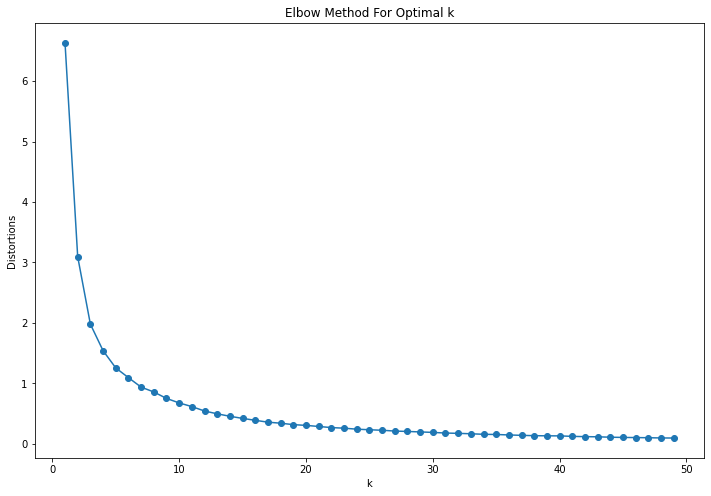

In [130]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
plt.savefig('elbow.png')
plt.show()

In [131]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 50

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(coords)
    labels = kmeans.labels_
    sil.append(silhouette_score(coords, labels, metric = 'euclidean'))
    

In [132]:
sil

[0.4338548935426263,
 0.4068879491965455,
 0.35927680879239715,
 0.37443738823819667,
 0.358746880008811,
 0.3504921569688955,
 0.34710043286876463,
 0.35551544914376104,
 0.34995610392977944,
 0.352992569206162,
 0.35684329044958385,
 0.35596542508044543,
 0.36836406016207546,
 0.36709309754382585,
 0.370612388813473,
 0.3684510830265411,
 0.381310604258657,
 0.38020956022039387,
 0.38006327670254153,
 0.3676023102447591,
 0.37745976234231493,
 0.38372926701956483,
 0.3668957086388125,
 0.37261934053732393,
 0.3719765896318938,
 0.3729341972502759,
 0.38179098341014656,
 0.37987680540413765,
 0.37393127072593807,
 0.39099804686093026,
 0.3766102304291159,
 0.37098975442403703,
 0.3840736125927538,
 0.3803027168486064,
 0.38271339667917165,
 0.38628864660677176,
 0.38604406502957017,
 0.38601009188157226,
 0.3954477226099337,
 0.3963806698698055,
 0.3991264502423905,
 0.40853663716185723,
 0.40110846185930915,
 0.40143199902091586,
 0.4011876796592588,
 0.40027195761624884,
 0.41356234

In [166]:
kmeans = KMeans(n_clusters=50, init='k-means++')
kmeans.fit(coords)
y = kmeans.labels_
print("k = 50", " silhouette_score ", silhouette_score(coords, y, metric='euclidean'))

k = 50  silhouette_score  0.41171489017517204


In [167]:
top_toilets['cluster'] = kmeans.predict(top_toilets[['Latitude','Longitude']])
top_toilets.head()

2,LavatoryID,Description,City,Street,opening_hours,street_address,Number,PostalCode,Country,Longitude,...,isHandicappedAccessible_1,Price_1,canBePayedWithCoins_1,canBePayedInApp_1,hasChangingTable_1,hasUrinal_1,google_rating_rank_1,Sum,ratings_2,cluster
185,Wall_122818,"Wall CT, Dennewitzplatz, Dennewitzstr.",Berlin,"Dennewitzplatz, Dennewitzstr. ggü. 22 (0-24 Uhr)",00:00-24:00,"Dennewitzplatz, Dennewitzstr. ggü. 22",NaN,10783,Deutschland,13.366937,...,2,15,3,2,2,3,16,43,5,1
182,Wall_122815,"Wall CT, Büsingstr.",Berlin,Büsingstr. ggü. 2 (0-24 Uhr),00:00-24:00,Büsingstr. ggü. 2,NaN,12161,Deutschland,13.326160,...,2,15,3,2,2,0,20,44,5,30
173,Wall_122590,"Wall CT, Hans-Rosenthal-Platz , Kufsteiner Str.",Berlin,"Hans-Rosenthal-Platz , Kufsteiner Str. (0-24...",00:00-24:00,"Hans-Rosenthal-Platz , Kufsteiner Str.",NaN,10825,Deutschland,13.336930,...,2,15,3,2,2,3,16,43,5,28
360,Fremd_1,Toilette Am Denkmal für die ermordeten Juden E...,Berlin,Am Denkmal für die ermordeten Juden Europas (H...,NaN,Am Denkmal für die ermordeten Juden Europas,NaN,10117,Deutschland,13.380450,...,2,20,0,0,0,0,20,42,5,37
86,Wall_120447,"Wall CT, Griechische Allee",Berlin,Griechische Allee 2 (0-24 Uhr),00:00-24:00,Griechische Allee 2,NaN,12459,Deutschland,13.513891,...,2,15,3,2,0,0,20,42,5,33


In [168]:
def recommend_toilets(df, latitude, longitude ):
    # Predict the cluster for longitude and latitude provided
    cluster = kmeans.predict(np.array([latitude,longitude]).reshape(1,-1))[0]
    print(cluster)
   
    # Get the best restaurant in this cluster
    return  df[df['cluster']==cluster].iloc[0:5][['LavatoryID', 'Latitude','Longitude','geo_distance','cluster']]

In [169]:
recommend_toilets(top_toilets,52.52646152725616, 13.376623742933933)

37


2,LavatoryID,Latitude,Longitude,geo_distance,cluster
360,Fremd_1,52.513760,13.380450,1.436327,37
180,Wall_122812,52.497951,13.391326,3.323692,37
158,Wall_122572,52.522000,13.400429,1.685760,37
102,Wall_120737,52.511667,13.400784,2.319914,37
12,Wall_118295,52.504114,13.391283,2.676410,37


In [157]:
near_toilets = data.sort_values(by=['geo_distance'], ascending=True)
near_toilets.iloc[0:5][['LavatoryID', 'Latitude','Longitude','geo_distance']]

2,LavatoryID,Latitude,Longitude,geo_distance
157,Wall_122531,52.528958,13.378163,0.296527
161,Wall_122575,52.516372,13.375539,1.124653
294,Wall_3389,52.516609,13.381269,1.140087
271,Wall_124364,52.537157,13.365744,1.399000
360,Fremd_1,52.513760,13.380450,1.436327


In [ ]:
def recommend_toilets(df, latitude, longitude, filter):

  filtered_toilets= df.sort_values(by=['geo_distance'], ascending=True)
  if filter=='Free':
    return  filtered_toilets[(filtered_toilets['Price']=='0,00')].iloc[0:4][['LavatoryID', 'Latitude','Longitude',
                                                                        'geo_distance','cluster','ratings']]
  elif filter=='Handicapped':
    return  filtered_toilets[(filtered_toilets['isHandicappedAccessible']=='1')].iloc[0:4][['LavatoryID', 'Latitude','Longitude',
                                                                        'geo_distance','cluster','ratings']]
  else: 
        # Predict the cluster for longitude and latitude provided
    cluster = kmeans.predict(np.array([latitude,longitude]).reshape(1,-1))[0]
    print(cluster)
    # Get the best toilet in this cluster
    return  df[(df['cluster']==cluster)].iloc[0:4][['LavatoryID', 'Latitude','Longitude',
                                                                        'geo_distance','cluster','ratings']] 
# def recommend_toilets(df, latitude, longitude):
#     # Predict the cluster for longitude and latitude provided
#     cluster = kmeans.predict(np.array([latitude,longitude]).reshape(1,-1))[0]
#     print(cluster)
   
#     # Get the best toilet in this cluster
#     return  df[df['cluster']==cluster].iloc[0:5][['LavatoryID', 'Latitude','Longitude','geo_distance','cluster','ratings']]